In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = 'data/'

In [3]:
loans = pd.read_csv(f'{PATH}lending-club-data.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [7]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans',axis=1)

In [9]:
len(loans[loans['safe_loans'] == 1])/len(loans)

0.8111853319957262

### 81% of the loans are safe

### 19% of the loans are risky

In [10]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + [target]]

In [20]:
loans

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00,1
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00,-1
2,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00,1
3,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97,1
4,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122602,E,E5,1,0,MORTGAGE,1.50,medical,60 months,0,0,14.6,0.00,-1
122603,D,D2,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,0,15.2,0.00,1
122604,D,D3,0,6,MORTGAGE,12.28,medical,60 months,0,0,10.7,0.00,-1
122605,D,D5,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,1,46.3,0.00,-1


In [12]:
import json
f = open(f'{PATH}module-5-assignment-1-train-idx.json')
train_idx = json.load(f)
f = open(f'{PATH}module-5-assignment-1-validation-idx.json')
validation_idx = json.load(f)
f.close()

In [24]:
for column,type in zip(loans.columns,loans.dtypes):
    print(column,'-',type)

grade - object
sub_grade - object
short_emp - int64
emp_length_num - int64
home_ownership - object
dti - float64
purpose - object
term - object
last_delinq_none - int64
last_major_derog_none - int64
revol_util - float64
total_rec_late_fee - float64
safe_loans - int64


In [36]:
loans = pd.get_dummies(loans)

In [37]:
loans

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,0,11,27.65,1,1,83.7,0.00,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1.00,1,1,9.4,0.00,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,11,8.72,1,1,98.5,0.00,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,11,20.00,0,1,21.0,16.97,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,4,11.20,1,1,28.3,0.00,1,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122602,1,0,1.50,0,0,14.6,0.00,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
122603,0,11,11.26,0,0,15.2,0.00,1,0,0,...,0,0,0,0,0,0,0,0,1,0
122604,0,6,12.28,0,0,10.7,0.00,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
122605,0,11,18.45,1,1,46.3,0.00,-1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[validation_idx]

In [51]:
train_features_matrix = train_data.drop('safe_loans',axis=1).to_numpy()

In [52]:
train_label_array = train_data['safe_loans'].to_numpy()

In [55]:
validation_features_matrix = validation_data.drop('safe_loans',axis=1).to_numpy()
validation_label_array = validation_data['safe_loans'].to_numpy()

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
decision_tree_model = DecisionTreeClassifier(max_depth=6)

In [60]:
decision_tree_model.fit(train_features_matrix,train_label_array)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
small_model = DecisionTreeClassifier(max_depth=2)
small_model.fit(train_features_matrix,train_label_array)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
19,0,11,11.18,1,1,82.4,0.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
79,0,10,16.85,1,1,96.4,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
24,0,3,13.97,0,1,59.5,0.0,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
41,0,11,16.33,1,1,62.1,0.0,-1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
decision_tree_model.predict(sample_validation_data.drop('safe_loans',axis=1).to_numpy())

array([ 1, -1, -1,  1], dtype=int64)

### The decision tree model got 50% of the predictions on sample_validation_data right

In [66]:
decision_tree_model.predict_proba(sample_validation_data.drop('safe_loans',axis=1).to_numpy())

array([[0.34156543, 0.65843457],
       [0.53630646, 0.46369354],
       [0.64750958, 0.35249042],
       [0.20789474, 0.79210526]])

### The 4th loan has the highest probability of being classified as a safe loan

In [70]:
import sklearn.tree as tree

[Text(465.0, 755.0, 'X[7] <= 0.5\ngini = 0.5\nsamples = 37224\nvalue = [18476, 18748]'),
 Text(232.5, 453.0, 'X[8] <= 0.5\ngini = 0.497\nsamples = 32094\nvalue = [17218, 14876]'),
 Text(116.25, 151.0, 'gini = 0.483\nsamples = 21728\nvalue = [12875, 8853]'),
 Text(348.75, 151.0, 'gini = 0.487\nsamples = 10366\nvalue = [4343, 6023]'),
 Text(697.5, 453.0, 'X[6] <= 14.83\ngini = 0.37\nsamples = 5130\nvalue = [1258, 3872]'),
 Text(581.25, 151.0, 'gini = 0.355\nsamples = 4987\nvalue = [1153, 3834]'),
 Text(813.75, 151.0, 'gini = 0.39\nsamples = 143\nvalue = [105, 38]')]

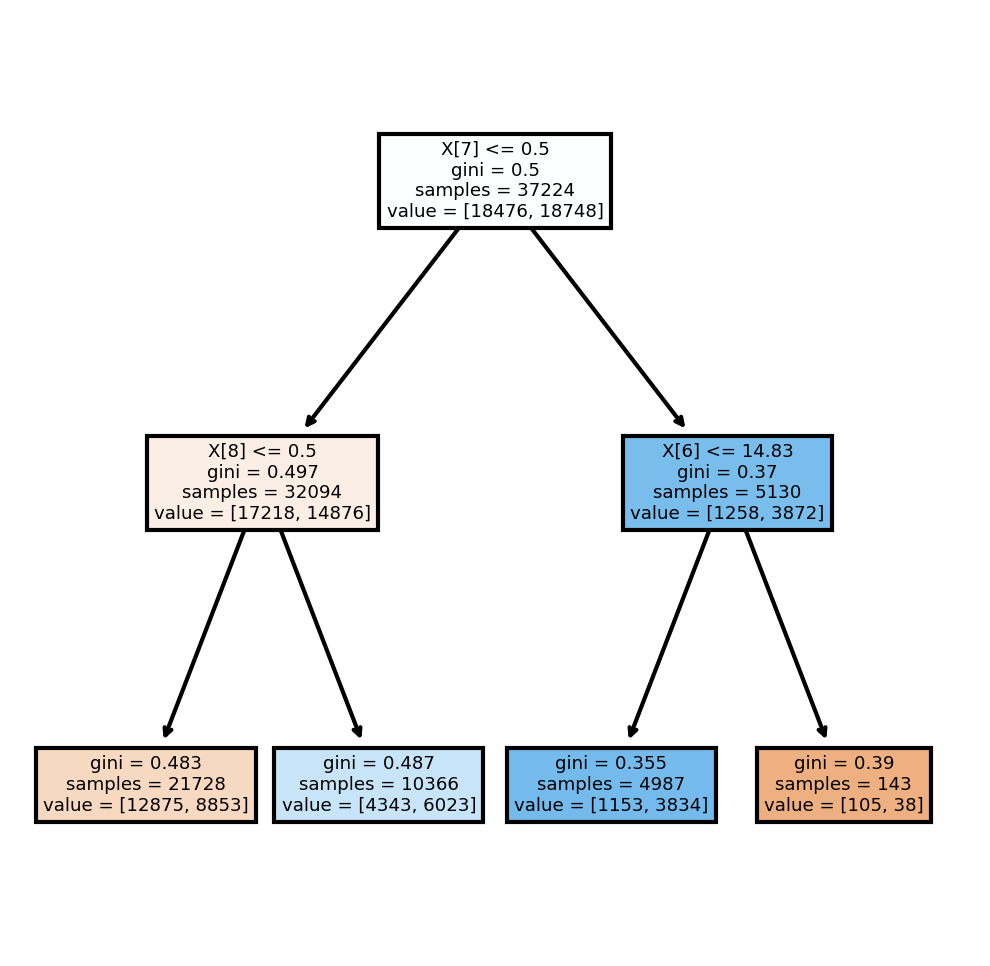

In [76]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(small_model,
               filled = True)

In [77]:
small_model.predict_proba(sample_validation_data.drop('safe_loans',axis=1).to_numpy())

array([[0.41896585, 0.58103415],
       [0.59255339, 0.40744661],
       [0.59255339, 0.40744661],
       [0.23120112, 0.76879888]])

### Probability predictions for the 2nd and  3rd entry in the sample_validation_data are exactly the same because they lie on the same node. Since the depth is less, many datapoints fall in the same nodes.

In [94]:
print(sample_validation_data.columns[7])
print(sample_validation_data.columns[8])
print(sample_validation_data.columns[6])

safe_loans
grade_A
total_rec_late_fee


In [96]:
sample_validation_data[['safe_loans','grade_A','total_rec_late_fee']]

,safe_loans,grade_A,total_rec_late_fee
19,1,0,0.0
79,1,0,0.0
24,-1,0,0.0
41,-1,1,0.0


In [91]:
print(small_model.score(train_features_matrix,train_label_array))
print(decision_tree_model.score(train_features_matrix,train_label_array))

0.6135020416935311
0.6405276165914464


In [92]:
print(small_model.score(validation_features_matrix,validation_label_array))
print(decision_tree_model.score(validation_features_matrix,validation_label_array))

0.6193451098664369
0.6361482119775959


### Accuracy of the decision_tree_model on the entire validation data is 0.64

In [93]:
big_model = DecisionTreeClassifier(max_depth=10)
big_model.fit(train_features_matrix,train_label_array)
print(big_model.score(train_features_matrix,train_label_array))
print(big_model.score(validation_features_matrix,validation_label_array))

0.6637921770900495
0.6262386902197329


### big_model performs worse on validation_data than decision_tree_model. This is a sign of overfitting

In [97]:
decision_tree_model.predict(validation_features_matrix)

array([-1,  1, -1, ..., -1, -1,  1], dtype=int64)

In [98]:
validation_label_array

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

In [99]:
decision_tree_model.predict(validation_features_matrix) - validation_label_array

array([ 0,  2,  0, ..., -2, -2,  0], dtype=int64)

In [100]:
np.count_nonzero(decision_tree_model.predict(validation_features_matrix) - validation_label_array == 2)

1661

In [101]:
np.count_nonzero(decision_tree_model.predict(validation_features_matrix) - validation_label_array == -2)

1717

### False positives = 1661, False negatives = 1717

In [102]:
20000*1661 + 10000*1717

50390000

### Total cost = 50390000